#### Загрузка набора данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math


from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import linear_model, tree, neighbors, ensemble

from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.pipeline import make_pipeline


df = pd.read_csv("../data/car_price_prediction.csv")

df = df.drop(columns=["ID"])

df

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 17 columns]

#### Анализ датасета и очистка данных

In [2]:
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [3]:
df["Engine volume"] = df["Engine volume"].str.replace("Turbo", "")
df["Engine volume"] = pd.to_numeric(df["Engine volume"])
df["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [4]:
df["Mileage"] = df["Mileage"].str.replace("km", "")
df["Mileage"] = df["Mileage"].astype("int64")
df["Mileage"].unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923])

In [5]:
df["Levy"] = df["Levy"].replace("-", "0")
df["Levy"] = df["Levy"].astype("int64")
df["Levy"].unique()

array([ 1399,  1018,     0,   862,   446,   891,   761,   751,   394,
        1053,  1055,  1079,   810,  2386,  1850,   531,   586,  1249,
        2455,   583,  1537,  1288,   915,  1750,   707,  1077,  1486,
        1091,   650,   382,  1436,  1194,   503,  1017,  1104,   639,
         629,   919,   781,   530,   640,   765,   777,   779,   934,
         769,   645,  1185,  1324,   830,  1187,  1111,   760,   642,
        1604,  1095,   966,   473,  1138,  1811,   988,   917,  1156,
         687, 11714,   836,  1347,  2866,  1646,   259,   609,   697,
         585,   475,   690,   308,  1823,  1361,  1273,   924,   584,
        2078,   831,  1172,   893,  1872,  1885,  1266,   447,  2148,
        1730,   730,   289,   502,   333,  1325,   247,   879,  1342,
        1327,  1598,  1514,  1058,   738,  1935,   481,  1522,  1282,
         456,   880,   900,   798,  1277,   442,  1051,   790,  1292,
        1047,   528,  1211,  1493,  1793,   574,   930,  1998,   271,
         706,  1481,

In [6]:
df["Cylinders"] = df["Cylinders"].astype("int64")
df["Cylinders"].unique()

array([ 6,  4,  8,  1, 12,  3,  2, 16,  5,  7,  9, 10, 14])

In [7]:
df["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [8]:
df["Doors"] = df["Doors"].map(
    {"02-Mar": "Двухдверный", "04-May": "Четырехдверный", ">5": "Многодверный"}
)
df["Doors"].unique()

array(['Четырехдверный', 'Двухдверный', 'Многодверный'], dtype=object)

In [9]:
sorted_df = df.sort_values(by="Price")
sorted_df["Price"].unique()

array([       1,        3,        6, ...,   627220,   872946, 26307500])

In [10]:
print(f"Количество строк до удаления некорректных значений: {len(df)}")
df = df[df["Price"] >= 500]
print(f"Количество строк после удаления некорректных значений: {len(df)}")

Количество строк до удаления некорректных значений: 19237
Количество строк после удаления некорректных значений: 17574


In [11]:
sorted_df = df.sort_values(by="Price")
sorted_df["Price"].unique()

array([     500,      549,      600, ...,   627220,   872946, 26307500])

In [12]:
sorted_df = df.sort_values(by="Prod. year")
sorted_df["Prod. year"].unique()

array([1943, 1953, 1957, 1964, 1965, 1968, 1973, 1974, 1977, 1978, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [13]:
df

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     0          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19231   5802  1055  MERCEDES-BENZ    E 350        2013      Sedan   
19232   8467     0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005          6   
1                   No    Petrol            3.0   192000          6   
2                   No    Petrol            1.3   200000          4   
3                  Yes    Hybrid            2.5   168966          4   
4                  Yes    Petrol            1.3    91901          4   
...                ...       ...            ...      ...        ...   
19231              Yes    Diesel            3.5   107800          6   
19232              Yes       CNG            2.0   300000          4   
19233              Yes    Petrol            2.4   161600          4   
19234              Yes    Diesel            2.0   116365          4   
19235              Yes    Diesel            2.0    51258          4   

      Gear box type Drive wheels           Doors             Wheel   Color  \
0         Automatic          4x4  Четырехдверный        Left wheel  Silver   
1         Tiptronic          4x4  Четырехдверный        Left wheel   Black   
2          Variator        Front  Четырехдверный  Right-hand drive   Black   
3         Automatic          4x4  Четырехдверный        Left wheel   White   
4         Automatic        Front  Четырехдверный        Left wheel  Silver   
...             ...          ...             ...               ...     ...   
19231     Automatic         Rear  Четырехдверный        Left wheel    Grey   
19232        Manual         Rear     Двухдверный        Left wheel  Silver   
19233     Tiptronic        Front  Четырехдверный        Left wheel     Red   
19234     Automatic        Front  Четырехдверный        Left wheel    Grey   
19235     Automatic        Front  Четырехдверный        Left wheel   Black   

       Airbags  
0           12  
1            8  
2            2  
3            0  
4            4  
...        ...  
19231       12  
19232        5  
19233        8  
19234        4  
19235        4  

[17574 rows x 17 columns]

#### Очистка дубликатов и пропущенных значений

In [14]:
df.duplicated().sum()

np.int64(2773)

In [15]:
df.drop_duplicates(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27528\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [16]:
df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

#### Очистка выбросов

In [17]:
df.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

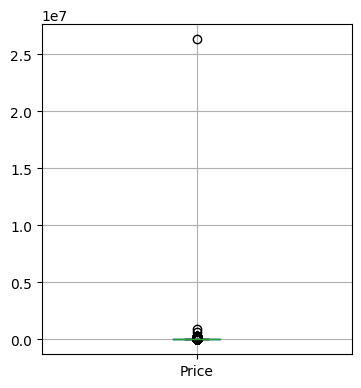

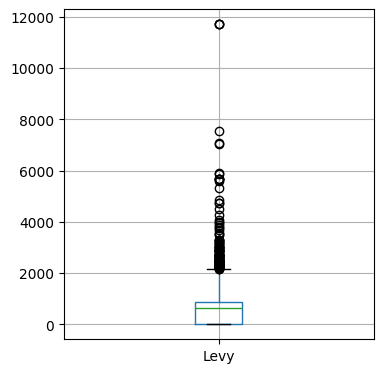

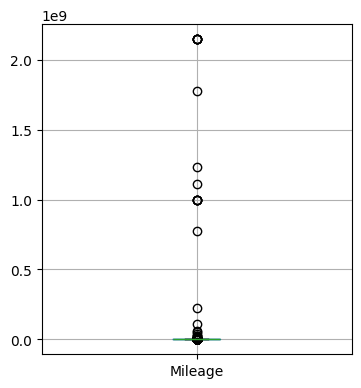

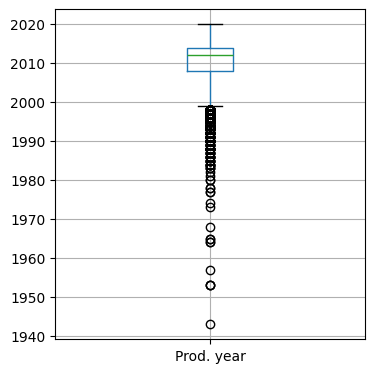

In [18]:
numeric_features_with_outliers = [
    "Price",
    "Levy",
    "Mileage",
    "Prod. year",
]

i = 1
for col in numeric_features_with_outliers:
    plt.figure(figsize=(4, 30))
    plt.subplot(6, 1, i)
    df.boxplot(column=col)
    i += 1

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Количество строк до удаления выбросов: {len(df)}")

for column in numeric_features_with_outliers:
    df = remove_outliers(df, column)

print(f"Количество строк после удаления выбросов: {len(df)}")

Количество строк до удаления выбросов: 14801
Количество строк после удаления выбросов: 12597


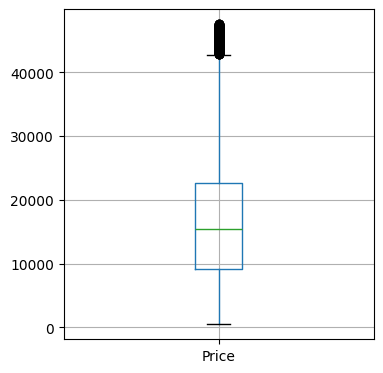

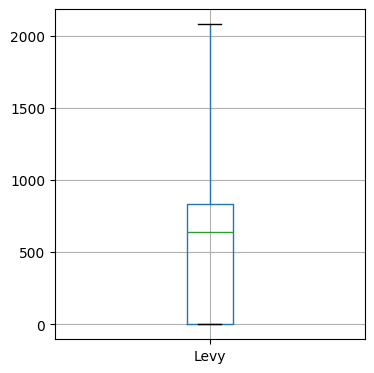

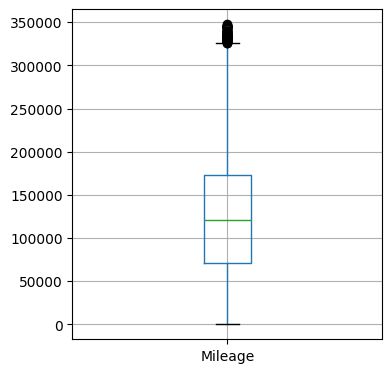

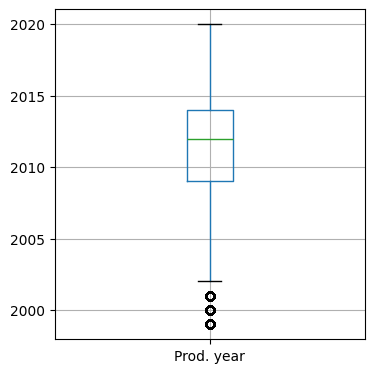

In [20]:
i = 1
for col in numeric_features_with_outliers:
    plt.figure(figsize=(4, 30))
    plt.subplot(6, 1, i)
    df.boxplot(column=col)
    i += 1

#### Разбиение на выборки

In [21]:
X = df
y = df["Category"]

train_df, test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Размеры выборок:")
print(f"Обучающая выборка: {train_df.shape[0]} записей")
print(train_df.Category.value_counts())
print(f"Тестовая выборка: {test_df.shape[0]} записей")
print(test_df.Category.value_counts())

Размеры выборок:
Обучающая выборка: 8817 записей
Category
Sedan          3954
Jeep           2263
Hatchback      1554
Minivan         312
Coupe           251
Universal       180
Microbus        143
Goods wagon     120
Pickup           22
Cabriolet        16
Limousine         2
Name: count, dtype: int64
Тестовая выборка: 3780 записей
Category
Sedan          1692
Jeep            990
Hatchback       636
Minivan         151
Coupe           117
Universal        82
Goods wagon      52
Microbus         46
Pickup            8
Cabriolet         5
Limousine         1
Name: count, dtype: int64


#### Oversampling

In [22]:
def oversample(df):
    X = df.drop("Category", axis=1)
    y = df["Category"]

    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)  # type: ignore

    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df


train_df_overs = oversample(train_df)
test_df_overs = oversample(test_df)

print("Размеры выборок:")
print(f"Обучающая выборка: {train_df_overs.shape[0]} записей")
print(train_df_overs.Category.value_counts())
print(f"Тестовая выборка: {test_df_overs.shape[0]} записей")
print(test_df_overs.Category.value_counts())

Размеры выборок:
Обучающая выборка: 43494 записей
Category
Sedan          3954
Jeep           3954
Universal      3954
Hatchback      3954
Coupe          3954
Goods wagon    3954
Minivan        3954
Microbus       3954
Pickup         3954
Limousine      3954
Cabriolet      3954
Name: count, dtype: int64
Тестовая выборка: 18612 записей
Category
Hatchback      1692
Sedan          1692
Universal      1692
Jeep           1692
Coupe          1692
Minivan        1692
Goods wagon    1692
Microbus       1692
Pickup         1692
Cabriolet      1692
Limousine      1692
Name: count, dtype: int64


In [23]:
price_y_train = train_df["Price"]
price_y_test = test_df["Price"]
train_df = train_df.drop(columns=["Price"])
test_df = test_df.drop(columns=["Price"])

#### Ручной синтез признаков.

In [24]:
def age_create(df): 
    df["Age"] = 2020 - df["Prod. year"]
    df = df.drop(columns=["Prod. year"])
    return df

train_df = age_create(train_df)
test_df = age_create(test_df)

In [25]:
sorted_df = train_df.sort_values(by="Age")
sorted_df["Age"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

<Axes: >

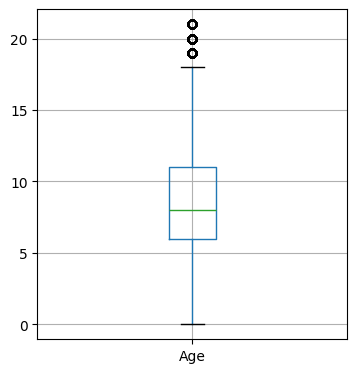

In [26]:
plt.figure(figsize=(4, 30))
plt.subplot(6, 1, i)
train_df.boxplot(column="Age")

#### Унитарное кодирование категориальных признаков

In [27]:
train_df.dtypes

Levy                  int64
Manufacturer         object
Model                object
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
Age                   int64
dtype: object

In [28]:
categorical_features_for_encoding = [
    "Leather interior",
    "Category",
    "Fuel type",
    "Gear box type",
    "Drive wheels",
    "Doors",
    "Wheel",
]

def onehot_encode(df):
    encoder = OneHotEncoder(sparse_output=False, drop="first")
    temp = encoder.fit_transform(df[categorical_features_for_encoding])
    df = df.drop(columns=categorical_features_for_encoding)
    return temp


temp = onehot_encode(train_df)
temp
# onehot_encode(test_df)

# train_df

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

#### Масштабирование признаков

In [29]:
train_df.dtypes

Levy                  int64
Manufacturer         object
Model                object
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
Age                   int64
dtype: object

In [30]:
scaler = StandardScaler()

numeric_features_for_stardartization = [
    "Levy",
    "Engine volume",
    "Mileage",
    "Cylinders",
    "Airbags",
    "Age",
]

train_df[numeric_features_for_stardartization] = scaler.fit_transform(
    train_df[numeric_features_for_stardartization]
)
test_df[numeric_features_for_stardartization] = scaler.transform(
    test_df[numeric_features_for_stardartization]
)

train_df

Levy Manufacturer              Model   Category Leather interior  \
15146 -1.192982       TOYOTA              Prius      Sedan               No   
14145 -1.192982       TOYOTA             Ractis      Sedan               No   
8943   0.081576      HYUNDAI            Elantra      Sedan               No   
17889 -1.192982       SUBARU  Forester L.L.BEAN       Jeep              Yes   
9515   1.703146      HYUNDAI                 H1  Universal              Yes   
...         ...          ...                ...        ...              ...   
18201 -1.192982         AUDI                 A4      Sedan              Yes   
7436   0.476602          KIA             Avella      Sedan              Yes   
7728   0.646834       TOYOTA              Prius  Hatchback               No   
1136  -1.192982         FORD             Fiesta      Sedan               No   
10640  0.446048          KIA          Optima EX      Sedan              Yes   

      Fuel type  Engine volume   Mileage  Cylinders Gear box type  \
15146    Petrol      -0.479341 -1.531744  -0.403213     Automatic   
14145    Petrol      -0.887855 -0.130245  -0.403213     Tiptronic   
8943     Petrol      -0.479341 -0.651122  -0.403213     Tiptronic   
17889       CNG       0.473858  1.263152  -0.403213     Automatic   
9515     Diesel       0.473858 -0.739330  -0.403213     Automatic   
...         ...            ...       ...        ...           ...   
18201    Petrol       0.337687  0.318018   1.538421        Manual   
7436     Petrol      -0.206998 -0.011145  -0.403213     Automatic   
7728     Hybrid      -0.887855  1.155137  -0.403213      Variator   
1136     Petrol      -0.751684 -0.697325  -0.403213     Automatic   
10640    Petrol       0.337687 -0.465093   7.363324     Tiptronic   

      Drive wheels           Doors             Wheel   Color   Airbags  \
15146        Front  Четырехдверный        Left wheel   White -0.683755   
14145        Front  Четырехдверный  Right-hand drive   Brown -1.190217   
8943         Front  Четырехдверный        Left wheel   Beige  0.835631   
17889          4x4  Четырехдверный        Left wheel   Green -0.430524   
9515         Front  Четырехдверный        Left wheel    Grey -0.683755   
...            ...             ...               ...     ...       ...   
18201          4x4  Четырехдверный        Left wheel    Grey -0.683755   
7436         Front  Четырехдверный        Left wheel  Silver  1.342092   
7728         Front  Четырехдверный        Left wheel  Silver  0.329169   
1136         Front  Четырехдверный        Left wheel  Silver  0.329169   
10640        Front  Четырехдверный        Left wheel  Silver  0.329169   

            Age  
15146 -1.946936  
14145  0.879266  
8943  -0.642535  
17889  1.531466  
9515  -1.512135  
...         ...  
18201  0.879266  
7436  -0.859935  
7728   0.661866  
1136  -1.077335  
10640 -0.425135  

[8817 rows x 16 columns]

#### Числовое кодирование категориальных признаков

In [31]:
train_df.dtypes

Levy                float64
Manufacturer         object
Model                object
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage             float64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags             float64
Age                 float64
dtype: object

In [32]:
categorical_features_for_encoding = [
    "Model",
    "Manufacturer",
    "Color",
    "Leather interior",
    "Category",
    "Fuel type",
    "Gear box type",
    "Drive wheels",
    "Doors",
    "Wheel",
]
def label_encode(df):
    encoder = LabelEncoder()
    for column in df.columns:
        if column in categorical_features_for_encoding:
            df[column] = encoder.fit_transform(df[column])

label_encode(train_df)
label_encode(test_df)

train_df

Levy  Manufacturer  Model  Category  Leather interior  Fuel type  \
15146 -1.192982            47    798         9                 0          5   
14145 -1.192982            47    864         9                 0          5   
8943   0.081576            17    420         9                 0          5   
17889 -1.192982            45    488         4                 1          0   
9515   1.703146            17    549        10                 1          1   
...         ...           ...    ...       ...               ...        ...   
18201 -1.192982             2    121         9                 1          5   
7436   0.476602            22    178         9                 1          5   
7728   0.646834            47    798         3                 0          2   
1136  -1.192982            13    474         9                 0          5   
10640  0.446048            22    743         9                 1          5   

       Engine volume   Mileage  Cylinders  Gear box type  Drive wheels  Doors  \
15146      -0.479341 -1.531744  -0.403213              0             1      2   
14145      -0.887855 -0.130245  -0.403213              2             1      2   
8943       -0.479341 -0.651122  -0.403213              2             1      2   
17889       0.473858  1.263152  -0.403213              0             0      2   
9515        0.473858 -0.739330  -0.403213              0             1      2   
...              ...       ...        ...            ...           ...    ...   
18201       0.337687  0.318018   1.538421              1             0      2   
7436       -0.206998 -0.011145  -0.403213              0             1      2   
7728       -0.887855  1.155137  -0.403213              3             1      2   
1136       -0.751684 -0.697325  -0.403213              0             1      2   
10640       0.337687 -0.465093   7.363324              2             1      2   

       Wheel  Color   Airbags       Age  
15146      0     14 -0.683755 -1.946936  
14145      1      3 -1.190217  0.879266  
8943       0      0  0.835631 -0.642535  
17889      0      6 -0.430524  1.531466  
9515       0      7 -0.683755 -1.512135  
...      ...    ...       ...       ...  
18201      0      7 -0.683755  0.879266  
7436       0     12  1.342092 -0.859935  
7728       0     12  0.329169  0.661866  
1136       0     12  0.329169 -1.077335  
10640      0     12  0.329169 -0.425135  

[8817 rows x 16 columns]

#### Формирование набора моделей

In [33]:
train_df.dtypes

Levy                float64
Manufacturer          int64
Model                 int64
Category              int64
Leather interior      int64
Fuel type             int64
Engine volume       float64
Mileage             float64
Cylinders           float64
Gear box type         int64
Drive wheels          int64
Doors                 int64
Wheel                 int64
Color                 int64
Airbags             float64
Age                 float64
dtype: object

In [34]:
test_df.dtypes

Levy                float64
Manufacturer          int64
Model                 int64
Category              int64
Leather interior      int64
Fuel type             int64
Engine volume       float64
Mileage             float64
Cylinders           float64
Gear box type         int64
Drive wheels          int64
Doors                 int64
Wheel                 int64
Color                 int64
Airbags             float64
Age                 float64
dtype: object

In [35]:
random_state = 9

set_config(transform_output="pandas")

models = {
    "linear": {"model": linear_model.LinearRegression(n_jobs=-1)},
    "linear_poly": {
        "model": make_pipeline(
            PolynomialFeatures(degree=2),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "linear_interact": {
        "model": make_pipeline(
            PolynomialFeatures(interaction_only=True),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "ridge": {"model": linear_model.RidgeCV()},
    "decision_tree": {
        "model": tree.DecisionTreeRegressor(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsRegressor(n_neighbors=7, n_jobs=-1)},
    "random_forest": {
        "model": ensemble.RandomForestRegressor(
            max_depth=7, random_state=random_state, n_jobs=-1
        )
    },
}

#### Обучение и оценка моделей с помощью различных алгоритмов

In [36]:
for model_name in models.keys():
    print(f"Model: {model_name}")

    model = models[model_name]["model"]

    fitted_model = model.fit(train_df.values, price_y_train.values.ravel())

    y_train_pred = fitted_model.predict(train_df)
    y_test_pred = fitted_model.predict(test_df)

    models[model_name]["fitted"] = fitted_model
    models[model_name]["train_preds"] = y_train_pred
    models[model_name]["preds"] = y_test_pred

    models[model_name]["RMSE_train"] = math.sqrt(
        metrics.mean_squared_error(price_y_train, y_train_pred)
    )
    models[model_name]["RMSE_test"] = math.sqrt(
        metrics.mean_squared_error(price_y_test, y_test_pred)
    )
    models[model_name]["RMAE_test"] = math.sqrt(
        metrics.mean_absolute_error(price_y_test, y_test_pred)
    )
    models[model_name]["R2_test"] = metrics.r2_score(price_y_test, y_test_pred)

Model: linear
Model: linear_poly


c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Model: linear_interact


c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\ma

Model: ridge
Model: decision_tree
Model: knn


c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


Model: random_forest


c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


#### Вывод результатов оценки

In [37]:
reg_metrics = pd.DataFrame.from_dict(models, "index")[
    ["RMSE_train", "RMSE_test", "RMAE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["RMAE_test", "R2_test"])